<a href="https://colab.research.google.com/github/J0SAL/Cropy/blob/main/notebooks/crop_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actions Preformed: 
# Preparing model for **Crop Recommendation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pickle

In [ ]:
crop = pd.read_csv('/content/crop_recommendation.csv')

# EDA

In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
crop.label.nunique()

22

In [ ]:
crop.label.value_counts()

banana         100
pigeonpeas     100
papaya         100
orange         100
maize          100
grapes         100
watermelon     100
coconut        100
blackgram      100
rice           100
pomegranate    100
jute           100
apple          100
lentil         100
mungbean       100
muskmelon      100
mango          100
mothbeans      100
coffee         100
chickpea       100
cotton         100
kidneybeans    100
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feee3576210>,
      dtype=object)

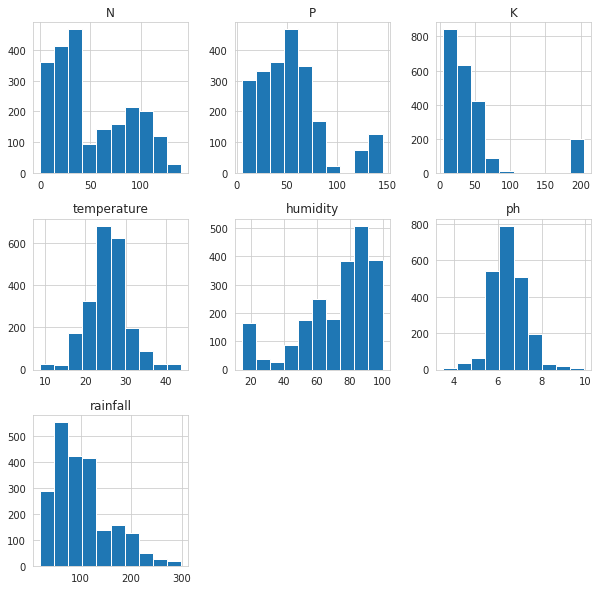

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
crop.hist(ax=ax)

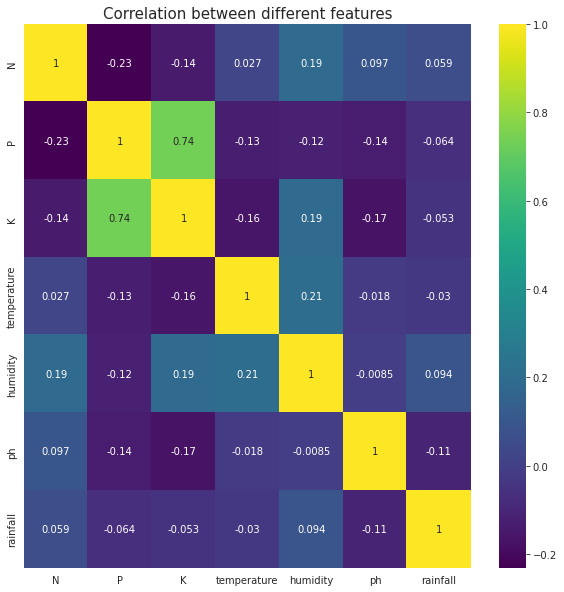

In [ ]:
#feature selection, checking correlated features
corr = crop.corr(method='pearson')
plt.figure(figsize=(10,10))
plt.title('Correlation between different features', fontsize = 15)
sns.heatmap(corr, annot=True, cmap='viridis')


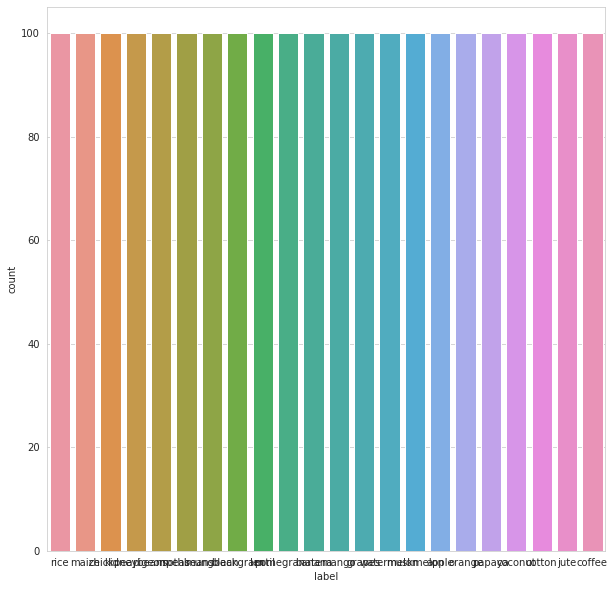

In [ ]:
#checking if the dataset is balanced
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.countplot(x='label',data=crop)

In [ ]:
crop.to_csv('/content/crop_recommendationss.csv')

# Feature Selection

In [ ]:
y = crop['label']
X = crop.drop(['label'], axis = 1)

In [ ]:
acc = []
models = []

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state =2)

# **Model Creation**

# 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

rf_y_pred = RF.predict(x_test)

rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)

print("Random Forest's Accuracy is: ", rf_accuracy)

score = cross_val_score(RF,X,y,cv=5)
print('Cross validation Score: ',score)

Random Forest's Accuracy is:  0.990909090909091
Cross validation Score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [ ]:
acc.append(rf_accuracy)
models.append('Random Forest')

In [ ]:
with open('randomf.pkl', 'wb') as f:
  pickle.dump(RF, f)

In [ ]:
# 	N	P	K	temperature	humidity	ph	rainfall	label
# RF.predict([[12,34,65,56,45,5,65]])
data = np.array([[45, 65, 34, 16.95, 22, 5, 23]])
RF.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['kidneybeans'], dtype=object)

In [ ]:
# model_path = '/content/randomf.pkl'
# model = pickle.load(open(model_path,'rb'))
# data = np.array([[45, 65, 34, 16.95, 22, 5, 23]])
# model.predict(data)


# 2. XG boost

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier(n_estimators=20)
XB.fit(x_train,y_train)

xg_y_pred = XB.predict(x_test)
xg_accuracy = metrics.accuracy_score(y_test, xg_y_pred);

print("XGBoost Accuracy is: ", xg_accuracy)

score = cross_val_score(XB,X,y,cv=5)
print('Cross validation Score: ',score)

XGBoost Accuracy is:  0.9818181818181818
Cross validation Score:  [0.97954545 0.99090909 0.98863636 0.99090909 0.98863636]


In [ ]:
acc.append(xg_accuracy)
models.append('XGBoost')

In [ ]:
with open('xg_boost.pkl', 'wb') as f:
  pickle.dump(XB, f)

# 3. Logistic Regression

In [ ]:
# coping the data set
crop2 = crop.copy()
scale_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'];

In [ ]:
# perform standard scaling
standardScaler = StandardScaler()
crop2[scale_columns] = standardScaler.fit_transform(crop2[scale_columns])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feee2e95390>,
      dtype=object)

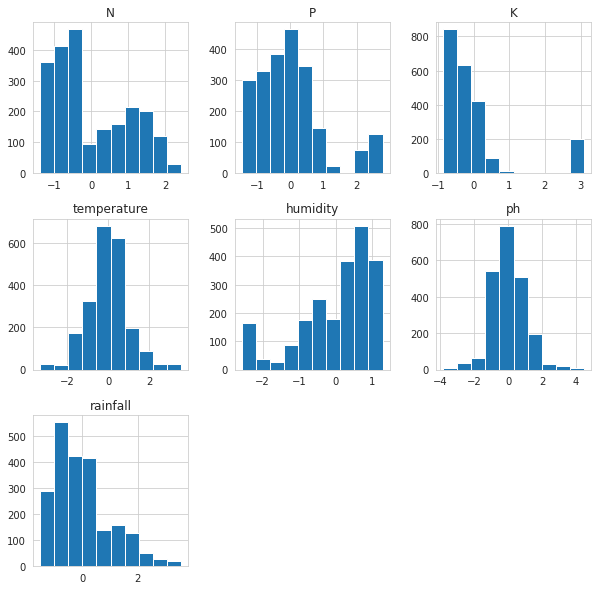

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
crop2.hist(ax=ax)

In [ ]:
crop2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice


In [ ]:
crop2.to_csv('/content/crop_recommendation_scaled.csv')

In [ ]:
y2 = crop2['label']
X2 = crop2.drop(['label'], axis = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=2)
LR.fit(x_train2, y_train2)
lr_y_pred = LR.predict(x_test2)
lg_accuracy = metrics.accuracy_score(y_test2, lr_y_pred)

print("Logistic Regression's Accuracy is: ", lg_accuracy)

Logistic Regression's Accuracy is:  0.9636363636363636


In [ ]:
# Warning
# score = cross_val_score(LR,X2,y2, cv=5)
# print('Cross validation Score: ',score)

In [ ]:
acc.append(lg_accuracy)
models.append('Logistic Regression')

In [ ]:
with open('logistic_reg.pkl', 'wb') as f:
  pickle.dump(LR, f)

In [ ]:
# model_path = '/content/logistic_reg.pkl'
# model = pickle.load(open(model_path,'rb'))
# data = np.array([[45, 65, 34, 16.95, 22, 5, 23]])
# model.predict(data)

# Comparing Accuracies 

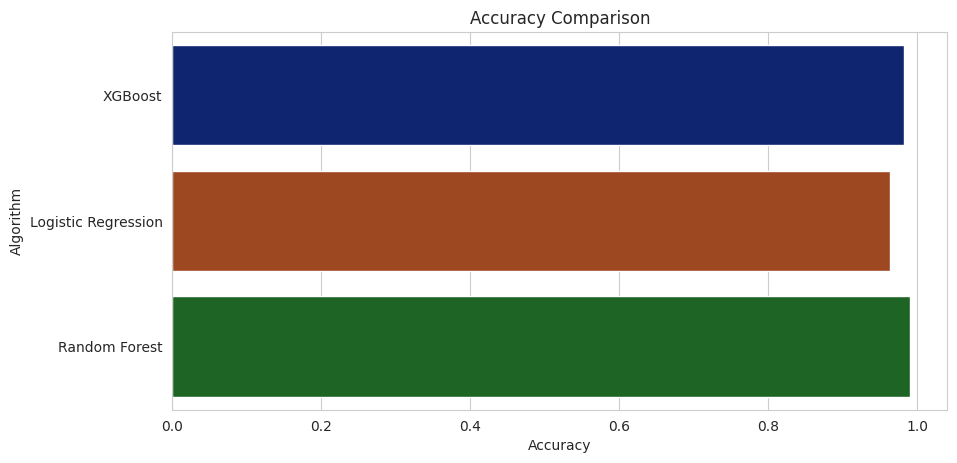

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = models,palette='dark')

In [ ]:
accuracy_models = dict(zip(models, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

XGBoost --> 0.9818181818181818
Logistic Regression --> 0.9636363636363636
Random Forest --> 0.990909090909091
